In [2]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', 500)

In [2]:
new_df_16 = pd.read_csv('datasets/extra_FIFA16_database.csv')


In [82]:
feature_cols = ['sofifa_id','height_cm','weight_kg', 'overall', 'potential', 'preferred_foot', 
                'weak_foot', 'skill_moves', 'work_rate', 'pace', 'shooting', 'passing', 
                'dribbling', 'defending', 'physic',
               'attacking_crossing', 'attacking_finishing',
               'attacking_heading_accuracy', 'attacking_short_passing',
               'attacking_volleys', 'skill_dribbling', 'skill_curve',
               'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
               'movement_acceleration', 'movement_sprint_speed',
               'movement_agility', 'movement_reactions', 'movement_balance',
               'power_shot_power', 'power_jumping', 'power_stamina',
               'power_strength', 'power_long_shots', 'mentality_aggression',
               'mentality_interceptions', 'mentality_positioning',
               'mentality_vision', 'mentality_penalties',
               'defending_marking', 'defending_standing_tackle', 'goalkeeping_diving',
               'goalkeeping_handling', 'goalkeeping_kicking',
               'goalkeeping_positioning', 'goalkeeping_reflexes']

In [35]:
target_cols = ['ls', 'st',
       'rs', 'lw', 'lf', 'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm',
       'lcm', 'cm', 'rcm', 'rm', 'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb',
       'lcb', 'cb', 'rcb', 'rb', 'player_positions' ]

In [36]:
new_df_16_f =new_df_16[feature_cols]

In [103]:
id_cols = ['sofifa_id', 'short_name', 'long_name', 'dob']
add_cols = id_cols + target_cols

In [75]:
def one_hot_encode(df, column_name):
    temp = df.copy()
    df = df.drop(column_name,axis = 1)
    df = df.join(pd.get_dummies(temp[column_name], prefix=column_name))
    return df

In [135]:
def preprocess_features(df):
    df_features =df[feature_cols]
    df_features = df_features.fillna(0)
    
    for feature in feature_cols:
        if df_features[feature].dtype == 'O':
            df_features[feature] = df_features[feature].str.split('+',expand=True)[0]
            df_features[feature] = df_features[feature].str.split('-',expand=True)[0]
    
    work_ = df_features.work_rate.str.split('/', n = 1, expand = True)
    df_features["work_rate_0"] = work_[0]    
    df_features["work_rate_1"] = work_[1]  
    
    df_features = df_features.drop(columns=["work_rate"])
    df_features = one_hot_encode(df_features, "preferred_foot")
    df_features = one_hot_encode(df_features, "work_rate_0")
    df_features = one_hot_encode(df_features, "work_rate_1")
    
    return df_features
    

In [172]:
def preprocess_df(df, fifa):
    df_ = preprocess_features(df)
    new_feature_cols = df_.columns[1:]
    df_ = df_.merge(df[add_cols], on='sofifa_id', how='left')
    for target in target_cols:
        if df_[target].dtype == 'O':
            df_[target] = df_[target].str.split('+',expand=True)[0]
            df_[target] = df_[target].str.split('-',expand=True)[0]
    df_ = df_.fillna(0)
    df_["gk"] = np.where(np.array(df_['player_positions'] == 'GK'), 100, 0 )
    columns = id_cols + new_feature_cols.tolist() + target_cols[:-1] + ['gk', 'player_positions']
    df_ = df_[columns]
    df_['fifa'] = fifa
    return df_

In [173]:
df_16 = preprocess_df(new_df_16, 16)

In [174]:
new_df_15 = pd.read_csv('datasets/extra_FIFA15_database.csv')
df_15 = preprocess_df(new_df_15, 15)

In [175]:
new_df_17 = pd.read_csv('~/Downloads/extra/players_17.csv')
df_17 = preprocess_df(new_df_17, 17)

In [183]:
new_df_18 = pd.read_csv('~/Downloads/extra/players_18.csv')
df_18 = preprocess_df(new_df_18, 18)

In [184]:
new_df_19 = pd.read_csv('~/Downloads/extra/players_19.csv')
df_19 = preprocess_df(new_df_19, 19)

In [185]:
new_df_20 = pd.read_csv('~/Downloads/extra/players_20.csv')
df_20 = preprocess_df(new_df_20, 20)

In [187]:
new_df_21 = pd.read_csv('~/Downloads/extra/players_21.csv')
df_21 = preprocess_df(new_df_21, 21)

In [188]:
pd.concat([df_15, df_16,df_17,df_18,df_19,df_20,df_21]).to_csv('~/Downloads/test.csv', index=False)

In [189]:
df = pd.read_csv("~/Downloads/test.csv")

In [190]:
df.dtypes.values

array([dtype('int64'), dtype('O'), dtype('O'), dtype('O'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('float64'), dtype('float64'),
       dtype('float64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('float64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'), dtype('int64'), dtype('int64'), dtype('int64'),
       dtype('int64'

In [200]:
GK = set(['GK'])
DEF = set(['LWB', 'RWB', 'LB', 'CB', 'RB'])
MID = set(['CAM','CDM', 'LM', 'CM', 'RM'])
ATK = set(['ST', 'LW', 'CF', 'RW'])

# sort positions into general position labels
def general_positions(pos):
    if pos in GK:
        return "GK"
    elif pos in DEF:
        return "DEF"
    elif pos in ATK:
        return "ATK"
    elif pos in MID:
        return "MID"
    else:
        return "UNK"
player_positions = df.player_positions

player_positions_general = player_positions.str.split(',', expand=True)[0].apply(general_positions).astype('category')
player_positions_general

0         ATK
1         ATK
2         MID
3         ATK
4          GK
         ... 
121404    MID
121405    DEF
121406    DEF
121407    MID
121408    MID
Name: 0, Length: 121409, dtype: category
Categories (4, object): ['ATK', 'DEF', 'GK', 'MID']

In [201]:
df["player_positions_general"] = player_positions_general

In [209]:
df[columns].to_csv('~/Downloads/test.csv', index=False)

In [208]:
df[columns]

,sofifa_id,short_name,long_name,dob,height_cm,weight_kg,overall,potential,weak_foot,skill_moves,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,defending_marking,defending_standing_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,preferred_foot_Left,preferred_foot_Right,work_rate_0_High,work_rate_0_Low,work_rate_0_Medium,work_rate_1_High,work_rate_1_Low,work_rate_1_Medium,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_positions,player_positions_general,fifa
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,1987-06-24,169,67,93,95,3,4,93.0,89.0,86.0,96.0,27.0,63.0,84,94,71,89,85,96,89,90,76,96,96,90,94,94,95,80,73,77,60,88,48,22,92,90,76,25.0,21,6,11,15,14,8,1,0,0,0,1,0,1,0,89,89,89,92,90,90,90,92,92,92,92,90,79,79,79,90,62,62,62,62,62,54,45,45,45,54,0,CF,ATK,15
1,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,1985-02-05,185,80,92,92,4,5,93.0,93.0,81.0,91.0,32.0,79.0,83,95,86,82,87,93,88,79,72,92,91,94,93,90,63,94,94,89,79,93,63,24,91,81,85,22.0,31,7,11,15,14,11,0,1,1,0,0,0,1,0,91,91,91,89,91,91,91,89,89,89,89,87,77,77,77,87,63,63,63,63,63,57,52,52,52,57,0,"LW, LM",ATK,15
2,9014,A. Robben,Arjen Robben,1984-01-23,180,80,90,90,2,4,93.0,86.0,83.0,92.0,32.0,64.0,80,85,50,86,86,93,85,83,76,90,93,93,93,89,91,86,61,78,65,90,47,39,89,84,80,29.0,26,10,8,11,5,15,1,0,1,0,0,0,1,0,84,84,84,88,87,87,87,88,88,88,88,87,78,78,78,87,64,64,64,64,64,55,46,46,46,55,0,"RM, LM, RW",MID,15
3,41236,Z. Ibrahimović,Zlatan Ibrahimović,1981-10-03,195,95,90,90,4,4,76.0,91.0,81.0,86.0,34.0,86.0,76,91,76,84,92,88,80,80,76,90,74,77,86,85,41,93,72,78,93,88,84,20,86,83,91,25.0,41,13,15,10,9,12,0,1,0,0,1,0,1,0,87,87,87,84,86,86,86,84,86,86,86,83,76,76,76,83,61,65,65,65,61,56,55,55,55,56,0,ST,ATK,15
4,167495,M. Neuer,Manuel Neuer,1986-03-27,193,92,90,90,4,1,0.0,0.0,0.0,0.0,0.0,0.0,25,25,25,42,25,25,25,25,41,31,58,61,43,89,35,42,78,44,83,25,29,30,25,20,37,25.0,25,87,85,92,90,86,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100,GK,GK,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121404,256679,K. Angulo,Kevin Angulo,1996-04-13,176,73,47,52,2,2,63.0,37.0,50.0,47.0,41.0,50.0,45,37,43,55,27,44,35,35,53,46,64,62,53,51,71,43,57,40,51,36,57,41,31,49,39,0.0,39,10,9,14,6,6,0,1,0,0,1,0,0,1,44,44,44,47,45,45,45,47,47,47,47,48,47,47,47,48,47,47,47,47,47,47,46,46,46,47,0,CM,MID,21
121405,257710,Zhang Mengxuan,Mengxuan Zhang,1999-04-26,177,70,47,52,2,2,58.0,23.0,26.0,27.0,50.0,48.0,23,16,45,31,26,19,21,22,25,24,60,56,45,48,70,35,65,55,45,23,44,50,25,25,35,0.0,56,12,13,8,14,6,0,1,0,1,0,0,1,0,32,32,32,30,30,30,30,30,29,29,29,31,32,32,32,31,42,41,41,41,42,45,47,47,47,45,0,CB,DEF,21
121406,250989,Wang Zhenghao,王政豪,2000-06-28,185,74,47,51,2,2,51.0,25.0,29.0,36.0,45.0,55.0,20,20,46,40,22,35,20,25,25,30,54,49,40,45,57,35,69,58,55,22,46,45,25,25,35,0.0,55,12,9,14,15,13,0,1,0,1,0,0,0,1,34,34,34,33,33,33,33,33,33,33,33,35,35,35,35,35,42,42,42,42,42,44,47,47,47,44,0,CB,DEF,21
121407,257697,Chen Zitong,Zitong Chen,1997-02-20,186,80,47,51,2,2,61.0,35.0,48.0,48.0,44.0,58.0,38,32,45,56,32,45,35,35,54,48,62,60,59,51,53,45,56,48,63,33,56,40,31,45,42,0.0,49,15,7,7,5,13,0,1,0,1,0,0,1,0,44,4

In [207]:
columns=['sofifa_id', 'short_name', 'long_name', 'dob', 'height_cm', 'weight_kg',
       'overall', 'potential', 'weak_foot', 'skill_moves', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'defending_marking', 'defending_standing_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes',
       'preferred_foot_Left', 'preferred_foot_Right', 'work_rate_0_High',
       'work_rate_0_Low', 'work_rate_0_Medium', 'work_rate_1_High',
       'work_rate_1_Low', 'work_rate_1_Medium', 'ls', 'st', 'rs', 'lw', 'lf',
       'cf', 'rf', 'rw', 'lam', 'cam', 'ram', 'lm', 'lcm', 'cm', 'rcm', 'rm',
       'lwb', 'ldm', 'cdm', 'rdm', 'rwb', 'lb', 'lcb', 'cb', 'rcb', 'rb', 'gk',
       'player_positions', 'player_positions_general', 'fifa']

In [1]:
import pandas as pd

In [3]:
df = pd.read_csv('datasets/cleaned_soccer_data_120K.csv')

In [7]:
df.query('preferred_foot_Left==1').player_positions.value_counts()

LB                 4659
CB                 2826
ST                 1585
GK                 1407
LB, LM             1277
                   ... 
CM, CB, LM            1
RW, CAM, LW, CM       1
CAM, RM, LM, LW       1
LM, CM, CDM, RM       1
CAM, CF, RM, LM       1
Name: player_positions, Length: 920, dtype: int64

In [110]:
df = df.query('fifa==16')

In [111]:
df.player_positions = df.player_positions.str.split(', ')

In [112]:
df.player_positions

15465        [RW, CF]
15466        [LW, LM]
15467    [RM, LM, RW]
15468            [GK]
15469            [ST]
             ...     
30341            [CM]
30342            [CM]
30343            [GK]
30344        [LB, LM]
30345            [GK]
Name: player_positions, Length: 14881, dtype: object

In [113]:
result = df.player_positions.apply(lambda x: ", ".join(sorted(x)))
result = pd.DataFrame(result).reset_index(drop=True)

In [134]:
import numpy as np
result.player_positions.value_counts()[result.player_positions.value_counts() > 30]

CB                 1766
GK                 1618
ST                 1581
CDM, CM             947
CM                  708
LB                  639
RB                  551
CB, RB              385
CDM                 358
LM, RM              335
CAM                 303
CAM, CM             282
CB, LB              258
CB, CDM             229
LB, LM              218
LM                  214
RM                  209
LB, RB              207
RB, RM              174
CAM, CDM, CM        162
RM, ST              153
CAM, LM, RM         151
CAM, LM             135
LW, RW              124
CF, ST              122
CAM, ST             114
LM, ST              114
LM, RM, ST          110
CM, RM              109
RW, ST               98
CB, CDM, CM          96
RW                   81
CM, LM               76
CAM, RM              73
LW                   69
CB, LB, RB           69
LM, LW               64
LW, ST               60
LW, RW, ST           58
CAM, CM, RM          56
RM, RW               52
CM, LM, RM      

In [88]:
df.player_positions

15465         [RW,  CF]
15466         [LW,  LM]
15467    [RM,  LM,  RW]
15468              [GK]
15469              [ST]
              ...      
30341              [CM]
30342              [CM]
30343              [GK]
30344         [LB,  LM]
30345              [GK]
Name: player_positions, Length: 14881, dtype: object

In [81]:
df.player_positions.value_counts()[df.player_positions.value_counts()>40]

CB              1766
GK              1618
ST              1581
CM               708
LB               639
RB               551
CDM, CM          501
CM, CDM          446
CDM              358
CAM              303
CB, RB           259
LM               214
RM               209
LM, RM           173
RM, LM           162
CB, CDM          155
LB, LM           155
CB, LB           155
CAM, CM          148
RB, LB           143
CM, CAM          134
RB, RM           128
RB, CB           126
ST, CF           109
LB, CB           103
ST, RM            92
RW                81
CDM, CB           74
CAM, LM           72
CM, RM            70
ST, CAM           70
LW                69
ST, LM            68
CM, CDM, CAM      67
ST, RW            67
LW, RW            65
LB, RB            64
LM, LB            63
LM, CAM           63
RM, ST            61
RW, LW            59
CM, CAM, CDM      48
RM, RB            46
LM, ST            46
CAM, ST           44
ST, LW            42
CDM, CM, CB       42
Name: player_

In [30]:
feature_cols = ['height_cm', 'weight_kg',
       'overall', 'potential', 'weak_foot', 'skill_moves', 'pace', 'shooting',
       'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing',
       'attacking_finishing', 'attacking_heading_accuracy',
       'attacking_short_passing', 'attacking_volleys', 'skill_dribbling',
       'skill_curve', 'skill_fk_accuracy', 'skill_long_passing',
       'skill_ball_control', 'movement_acceleration', 'movement_sprint_speed',
       'movement_agility', 'movement_reactions', 'movement_balance',
       'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength',
       'power_long_shots', 'mentality_aggression', 'mentality_interceptions',
       'mentality_positioning', 'mentality_vision', 'mentality_penalties',
       'defending_marking', 'defending_standing_tackle', 'goalkeeping_diving',
       'goalkeeping_handling', 'goalkeeping_kicking',
       'goalkeeping_positioning', 'goalkeeping_reflexes',
            ]

In [37]:
f_cols=       ['preferred_foot_Left', 'preferred_foot_Right', 'work_rate_0_High',
       'work_rate_0_Low', 'work_rate_0_Medium', 'work_rate_1_High',
       'work_rate_1_Low', 'work_rate_1_Medium']

In [31]:
# normalize data using MinMaxScaler
from sklearn import preprocessing

scaler = preprocessing.MinMaxScaler()

df_preprocessed = pd.DataFrame(scaler.fit_transform(df[feature_cols]), columns=feature_cols)
df_preprocessed.head()


,height_cm,weight_kg,overall,potential,weak_foot,skill_moves,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,defending_marking,defending_standing_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,0.306122,0.366667,1.00,1.000000,0.75,0.75,0.958333,0.946237,0.924731,1.000000,0.266667,0.696629,0.852273,0.978495,0.733333,0.940476,0.921348,1.000000,0.943182,0.945055,0.821429,1.000000,0.976744,0.929412,0.952941,1.000000,0.9875,0.836957,0.658537,0.776471,0.546512,0.942529,0.458824,0.211111,0.956044,0.955056,0.752809,0.113636,0.227273,0.057471,0.116279,0.155556,0.146067,0.078652
1,0.612245,0.500000,0.98,0.960784,0.75,1.00,0.958333,1.000000,0.860215,0.957895,0.366667,0.876404,0.875000,1.000000,0.900000,0.857143,0.943820,0.967391,0.931818,0.802198,0.738095,0.945055,0.930233,0.964706,0.929412,1.000000,0.5750,0.989130,0.975610,0.905882,0.779070,1.000000,0.623529,0.288889,0.989011,0.853933,0.876404,0.215909,0.318182,0.068966,0.116279,0.155556,0.146067,0.112360
2,0.510204,0.500000,0.92,0.901961,0.25,0.75,0.958333,0.924731,0.881720,0.968421,0.355556,0.719101,0.852273,0.892473,0.511111,0.904762,0.932584,0.967391,0.909091,0.868132,0.761905,0.934066,0.941860,0.952941,0.941176,0.984127,0.9375,0.902174,0.573171,0.776471,0.616279,0.965517,0.447059,0.400000,0.945055,0.887640,0.820225,0.295455,0.261364,0.103448,0.081395,0.111111,0.044944,0.157303
3,0.775510,0.700000,0.92,0.901961,0.75,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.113636,0.118280,0.222222,0.464286,0.089888,0.130435,0.090909,0.076923,0.440476,0.285714,0.546512,0.588235,0.376471,0.936508,0.2375,0.239130,0.780488,0.400000,0.825581,0.114943,0.235294,0.300000,0.098901,0.730337,0.337079,0.079545,0.079545,0.965517,1.000000,1.000000,1.000000,0.955056
4,0.551020,0.583333,0.92,0.901961,0.75,0.75,0.864583,0.946237,0.849462,0.915789,0.466667,0.887640,0.818182,0.946237,0.800000,0.869048,0.943820,0.913043,0.909091,0.879121,0.642857,0.945055,0.895349,0.788235,0.882353,0.984127,0.5500,0.923913,0.670732,0.894118,0.744186,0.908046,0.811765,0.422222,0.967033,0.887640,0.876404,0.306818,0.477273,0.298851,0.279070,0.333333,0.359551,0.404494


In [32]:
mean = df_preprocessed.mean(axis=1)

In [33]:
pd.set_option('display.max_columns', None)
df_preprocessed

,height_cm,weight_kg,overall,potential,weak_foot,skill_moves,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,defending_marking,defending_standing_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,0.306122,0.366667,1.00,1.000000,0.75,0.75,0.958333,0.946237,0.924731,1.000000,0.266667,0.696629,0.852273,0.978495,0.733333,0.940476,0.921348,1.000000,0.943182,0.945055,0.821429,1.000000,0.976744,0.929412,0.952941,1.000000,0.9875,0.836957,0.658537,0.776471,0.546512,0.942529,0.458824,0.211111,0.956044,0.955056,0.752809,0.113636,0.227273,0.057471,0.116279,0.155556,0.146067,0.078652
1,0.612245,0.500000,0.98,0.960784,0.75,1.00,0.958333,1.000000,0.860215,0.957895,0.366667,0.876404,0.875000,1.000000,0.900000,0.857143,0.943820,0.967391,0.931818,0.802198,0.738095,0.945055,0.930233,0.964706,0.929412,1.000000,0.5750,0.989130,0.975610,0.905882,0.779070,1.000000,0.623529,0.288889,0.989011,0.853933,0.876404,0.215909,0.318182,0.068966,0.116279,0.155556,0.146067,0.112360
2,0.510204,0.500000,0.92,0.901961,0.25,0.75,0.958333,0.924731,0.881720,0.968421,0.355556,0.719101,0.852273,0.892473,0.511111,0.904762,0.932584,0.967391,0.909091,0.868132,0.761905,0.934066,0.941860,0.952941,0.941176,0.984127,0.9375,0.902174,0.573171,0.776471,0.616279,0.965517,0.447059,0.400000,0.945055,0.887640,0.820225,0.295455,0.261364,0.103448,0.081395,0.111111,0.044944,0.157303
3,0.775510,0.700000,0.92,0.901961,0.75,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.113636,0.118280,0.222222,0.464286,0.089888,0.130435,0.090909,0.076923,0.440476,0.285714,0.546512,0.588235,0.376471,0.936508,0.2375,0.239130,0.780488,0.400000,0.825581,0.114943,0.235294,0.300000,0.098901,0.730337,0.337079,0.079545,0.079545,0.965517,1.000000,1.000000,1.000000,0.955056
4,0.551020,0.583333,0.92,0.901961,0.75,0.75,0.864583,0.946237,0.849462,0.915789,0.466667,0.887640,0.818182,0.946237,0.800000,0.869048,0.943820,0.913043,0.909091,0.879121,0.642857,0.945055,0.895349,0.788235,0.882353,0.984127,0.5500,0.923913,0.670732,0.894118,0.744186,0.908046,0.811765,0.422222,0.967033,0.887640,0.876404,0.306818,0.477273,0.298851,0.279070,0.333333,0.359551,0.404494
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14876,0.510204,0.433333,0.00,0.254902,0.50,0.25,0.656250,0.430108,0.462366,0.494737,0.433333,0.584270,0.386364,0.408602,0.377778,0.428571,0.415730,0.467391,0.409091,0.406593,0.416667,0.406593,0.651163,0.576471,0.541176,0.111111,0.5500,0.423913,0.463415,0.529412,0.523256,0.344828,0.317647,0.322222,0.483516,0.449438,0.337079,0.386364,0.465909,0.091954,0.139535,0.077778,0.112360,0.078652
14877,0.367347,0.316667,0.00,0.235294,0.50,0.25,0.718750,0.365591,0.473118,0.515789,0.355556,0.516854,0.306818,0.290323,0.333333,0.511905,0.348315,0.445652,0.386364,0.362637,0.452381,0.417582,0.662791,0.694118,0.776471,0.222222,0.7375,0.402174,0.548780,0.447059,0.406977,0.321839,0.364706,0.200000,0.439560,0.415730,0.325843,0.295455,0.409091,0.091954,0.104651,0.100000,0.101124,0.056180
14878,0.530612,0.250000,0.00,0.196078,0.50,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.090909,0.118280,0.100000,0.214286,0.146067,0.184783,0.147727,0.142857,0.083333,0.197802,0.360465,0.352941,0.282353,0.095238,0.5500,0.184783,0.487805,0.129412,0.453488,0.103448,0.129412,0.222222,0.120879,0.247191,0.157303,0.125000,0.181818,0.586207,0.488372,0.488889,0.404494,0.516854
14879,0

In [35]:
df_preprocessed = df_preprocessed.sub(mean, axis=0)

In [47]:
df_preprocessed = pd.concat([df_preprocessed, df[f_cols].reset_index(drop=True)],axis=1, sort=False)

In [42]:
df_preprocessed

,height_cm,weight_kg,overall,potential,weak_foot,skill_moves,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,defending_marking,defending_standing_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes
0,-0.396999,-0.336455,0.296878,0.296878,0.046878,0.046878,0.255212,0.243115,0.221609,0.296878,-0.436455,-0.006493,0.149151,0.275373,0.030212,0.237354,0.218227,0.296878,0.240060,0.241933,0.118307,0.296878,0.273622,0.226290,0.249819,0.296878,0.284378,0.133835,-0.044585,0.073349,-0.156610,0.239407,-0.244298,-0.492011,0.252922,0.251934,0.049687,-0.589485,-0.475849,-0.645650,-0.586843,-0.547566,-0.557054,-0.624470
1,-0.128600,-0.240845,0.239155,0.219939,0.009155,0.259155,0.217488,0.259155,0.119370,0.217049,-0.374179,0.135559,0.134155,0.259155,0.159155,0.116298,0.202975,0.226546,0.190973,0.061353,-0.002750,0.204210,0.189387,0.223861,0.188567,0.259155,-0.165845,0.248285,0.234765,0.165037,0.038225,0.259155,-0.117316,-0.451956,0.248166,0.113087,0.135559,-0.524936,-0.422663,-0.671880,-0.624566,-0.585290,-0.594778,-0.628486
2,-0.178888,-0.189092,0.230908,0.212869,-0.439092,0.060908,0.269242,0.235640,0.192629,0.279329,-0.333536,0.030010,0.163181,0.203382,-0.177981,0.215670,0.243493,0.278300,0.219999,0.179040,0.072813,0.244974,0.252769,0.263850,0.252085,0.295035,0.248408,0.213082,-0.115921,0.087379,-0.072813,0.276426,-0.242033,-0.289092,0.255963,0.198549,0.131133,-0.393637,-0.427728,-0.585643,-0.607696,-0.577981,-0.644148,-0.531788
3,0.368536,0.293025,0.513025,0.494986,0.343025,-0.406975,-0.406975,-0.406975,-0.406975,-0.406975,-0.406975,-0.406975,-0.293338,-0.288695,-0.184752,0.057311,-0.317087,-0.276540,-0.316066,-0.330052,0.033502,-0.121260,0.139537,0.181261,-0.030504,0.529533,-0.169475,-0.167844,0.373513,-0.006975,0.418607,-0.292032,-0.171680,-0.106975,-0.308074,0.323362,-0.069896,-0.327429,-0.327429,0.558543,0.593025,0.593025,0.593025,0.548082
4,-0.192585,-0.160273,0.176394,0.158355,0.006394,0.006394,0.120977,0.202631,0.105856,0.172184,-0.276939,0.144035,0.074576,0.202631,0.056394,0.125442,0.200214,0.169438,0.165485,0.135515,-0.100749,0.201449,0.151743,0.044629,0.138747,0.240521,-0.193606,0.180307,-0.072874,0.150512,0.000580,0.164440,0.068159,-0.321384,0.223427,0.144035,0.132799,-0.436788,-0.266333,-0.444755,-0.464536,-0.410273,-0.384055,-0.339112
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14876,0.121339,0.044468,-0.388865,-0.133964,0.111135,-0.138865,0.267385,0.041242,0.073500,0.105871,0.044468,0.195404,-0.002502,0.019737,-0.011088,0.039706,0.026865,0.078526,0.020225,0.017728,0.027801,0.017728,0.262297,0.187605,0.152311,-0.277754,0.161135,0.035048,0.074549,0.140546,0.134390,-0.044038,-0.071218,-0.066643,0.094651,0.060573,-0.051787,-0.002502,0.077044,-0.296911,-0.249331,-0.311088,-0.276506,-0.310214
14877,-0.009801,-0.060481,-0.377148,-0.141854,0.122852,-0.127148,0.341602,-0.011556,0.095971,0.138642,-0.021592,0.139706,-0.070330,-0.086825,-0.043814,0.134757,-0.028833,0.068504,0.009216,-0.014510,0.075233,0.040435,0.285643,0.316970,0.399323,-0.154926,0.360352,0.025026,0.171633,0.069911,0.029829,-0.055309,-0.012442,-0.177148,0.062413,0.038583,-0.051305,-0.081693,0.031943,-0.285194,-0.272497,-0.277148,-0.276024,-0.320968
14878,0.313082,0.032470,-0.217530,-0.021451,0.282470,-0.217530,-0.217530,-0.217530,-0.217530,-0.217530,-0.217530,-0.217530,-0.126621,-0.099250,-0.117530,-0.003244,-0.071462,

In [1]:
df_preprocessed

NameError: name 'df_preprocessed' is not defined

In [60]:
from sklearn.decomposition import PCA
num_pc=16
pca = PCA(n_components=num_pc)
# pca.fit(df)
df_pca = pca.fit_transform(df_preprocessed)
# plt.plot(pca.explained_variance_)
# plt.show() # diminishing returns at 6 PCs
print(pca.components_) #eigenvectors pca.components_ has shape [n_components, n_features]
print(pca.components_.shape)
# print(pca.explained_variance_) #eigenvalues
print(pca.explained_variance_ratio_)
print(df_pca.shape)

[[ 1.73390618e-01  1.56191281e-01  6.12164442e-02  6.81959010e-02
   4.42549733e-02 -5.36350098e-02 -1.65706266e-01 -1.34351500e-01
  -1.41035672e-01 -1.56458777e-01 -7.75247679e-02 -1.48053912e-01
  -9.94797355e-02 -7.46258058e-02 -5.68971607e-02 -6.88802798e-02
  -6.84872025e-02 -1.10050058e-01 -9.19847485e-02 -6.45841351e-02
  -5.29240837e-02 -9.25188284e-02 -2.84093343e-02 -2.68566897e-02
  -2.94478174e-02  6.54757000e-02 -1.27898441e-02 -8.07741895e-02
   7.54340896e-02 -6.11160935e-02  9.74100084e-02 -9.84650830e-02
  -3.56500425e-02 -6.90394792e-03 -1.00074010e-01 -3.15029202e-02
  -5.42179250e-02 -1.34467325e-02 -2.71509421e-02  3.15740582e-01
   3.03099820e-01  2.88326013e-01  2.99294299e-01  3.15973785e-01
  -1.11399510e-01  1.11399510e-01 -2.62704571e-01 -1.92630494e-02
   2.81967620e-01 -1.02410967e-01 -8.76107746e-02  1.90021742e-01]
 [ 3.38234269e-03  1.09692897e-03 -4.91848934e-03 -1.65563237e-03
  -3.69064347e-02 -1.50570689e-02  1.78094939e-03 -3.35396774e-02
   9.0334

In [61]:
print(sum(pca.explained_variance_ratio_))

0.9520573387043421


In [63]:
df_pca.shape

(14881, 16)

In [73]:
columns= [f'PC_{i}' for i in range(16)]
df_embeddings = pd.DataFrame(df_pca, columns=columns)

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,PC_15
0,-1.004672,0.679770,0.786800,-0.596469,1.617179,0.208780,-0.041713,0.129514,0.355353,0.461676,0.377060,0.204262,-0.046130,-0.008004,0.105098,-0.010220
1,-1.257380,-0.922909,1.108288,0.085643,0.692131,0.546274,0.118004,-0.212046,0.049668,0.405091,0.279090,0.176233,-0.056607,0.108066,0.303878,-0.070908
2,-1.507310,0.435212,1.374117,0.355795,0.963797,0.331335,-0.104554,-0.094834,0.336412,0.475708,-0.175898,0.218184,-0.118534,0.002326,0.117932,0.029049
3,2.618102,-0.204024,0.644285,0.583359,0.191649,-0.087293,0.065758,-0.164368,0.211093,0.375151,0.449103,0.316108,0.107004,-0.061914,-0.066745,-0.201320
4,-0.615108,-0.572060,1.056468,-0.018176,-0.384779,-0.140243,0.465141,-0.247832,0.166143,0.231682,0.122185,0.146829,0.018561,0.009683,0.155963,0.188153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14876,0.244375,-0.143562,-0.120068,-0.502320,-0.135509,-0.030613,-0.074357,0.134156,-0.182126,-0.451275,-0.187990,0.005150,0.045781,-0.017040,-0.021094,-0.081536
14877,-0.598192,-0.760531,0.722272,0.624791,0.363865,0.532559,-0.761357,0.086368,-0.069850,-0.364052,-0.080553,-0.110556,0.052388,0.080362,-0.067542,-0.079395
14878,1.627816,-0.163727,0.349657,0.087591,0.055967,-0.146814,-0.147123,0.102880,0.063289,-0.437554,-0.015345,-0.203560,-0.066600,0.002800,-0.043655,-0.023647
14879,0.121293,1.205254,0.014331,-0.068229,0.046035,-0.110711,-0.343841,0.290532,-0.268482,-0.212166,-0.149427,-0.392514,-0.042175,0.120174,-0.051744,0.062699


In [80]:
df_ = pd.concat([df_embeddings, df[['sofifa_id','player_positions','player_positions_general']].reset_index(drop=True)],axis=1, sort=False)

In [82]:
df_.to_csv('datasets/embeddings_PCA_zero_mean.csv',index=False)

In [17]:
import pandas as pd


In [29]:
# visualizing the embeddings

import seaborn as sns
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [30]:
columns= [f'PC_{i}' for i in range(16)]


In [61]:
df = pd.read_csv('datasets/embeddings_PCA_zero_mean.csv')
df = df[df.player_positions.str.split(',').str.len() == 1]

In [62]:
df = df.query("player_positions != 'GK'")

In [63]:
df

,PC_0,PC_1,PC_2,PC_3,PC_4,PC_5,PC_6,PC_7,PC_8,PC_9,PC_10,PC_11,PC_12,PC_13,PC_14,PC_15,sofifa_id,player_positions,player_positions_general
4,-0.615108,-0.572060,1.056468,-0.018176,-0.384779,-0.140243,0.465141,-0.247832,0.166143,0.231682,0.122185,0.146829,0.018561,0.009683,0.155963,0.188153,176580,ST,ATK
5,-1.024173,-0.582202,1.145786,-0.311226,-0.339837,-0.384067,0.175554,0.003774,0.296553,0.263564,0.225880,0.296718,-0.066322,0.061341,0.092721,0.032180,183277,LM,MID
6,-0.558581,-0.611524,0.225159,-0.616924,1.211549,0.712668,0.506370,-0.367271,0.178237,0.256439,0.170841,0.246195,0.183472,0.095704,0.191753,0.037270,41236,ST,ATK
7,-0.932387,-0.607337,1.241180,-0.303147,-0.302774,-0.393296,0.138492,0.103135,0.154318,0.154496,0.491126,0.330278,-0.177614,0.110258,0.209974,0.229670,190871,LW,ATK
8,-1.022575,-0.679967,-0.456139,1.154077,-0.092556,-0.325734,-0.071746,-0.403967,0.185096,0.252411,0.102647,0.011507,-0.318656,0.027895,0.232986,-0.121989,164240,CB,DEF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14873,0.247200,-0.110020,-0.235620,-0.444150,-0.218219,-0.078984,-0.325511,0.221276,-0.105728,-0.341026,-0.057314,-0.086807,-0.078541,0.125824,-0.066491,-0.072321,227244,CM,MID
14874,0.250916,-0.154489,-0.023955,-0.548471,-0.088044,-0.119758,-0.147730,0.211978,-0.125246,-0.407699,-0.164591,0.018500,-0.021888,-0.026574,-0.055193,-0.044154,227881,CM,MID
14875,0.577241,-0.082887,-0.393483,-0.146068,-0.323493,0.194160,-0.245097,0.150537,-0.537771,-0.222847,-0.239043,0.009704,0.095179,0.152541,0.114941,-0.006171,220806,CB,DEF
14876,0.244375,-0.143562,-0.120068,-0.502320,-0.135509,-0.030613,-0.074357,0.134156,-0.182126,-0.451275,-0.187990,0.005150,0.045781,-0.017040,-0.021094,-0.081536,224867,CM,MID


In [64]:
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=300)
tsne_results = tsne.fit_transform(df[columns])

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 6501 samples in 0.016s...
[t-SNE] Computed neighbors for 6501 samples in 0.531s...
[t-SNE] Computed conditional probabilities for sample 1000 / 6501
[t-SNE] Computed conditional probabilities for sample 2000 / 6501
[t-SNE] Computed conditional probabilities for sample 3000 / 6501
[t-SNE] Computed conditional probabilities for sample 4000 / 6501
[t-SNE] Computed conditional probabilities for sample 5000 / 6501
[t-SNE] Computed conditional probabilities for sample 6000 / 6501
[t-SNE] Computed conditional probabilities for sample 6501 / 6501
[t-SNE] Mean sigma: 0.222192
[t-SNE] KL divergence after 250 iterations with early exaggeration: 62.343880
[t-SNE] KL divergence after 300 iterations: 1.760328


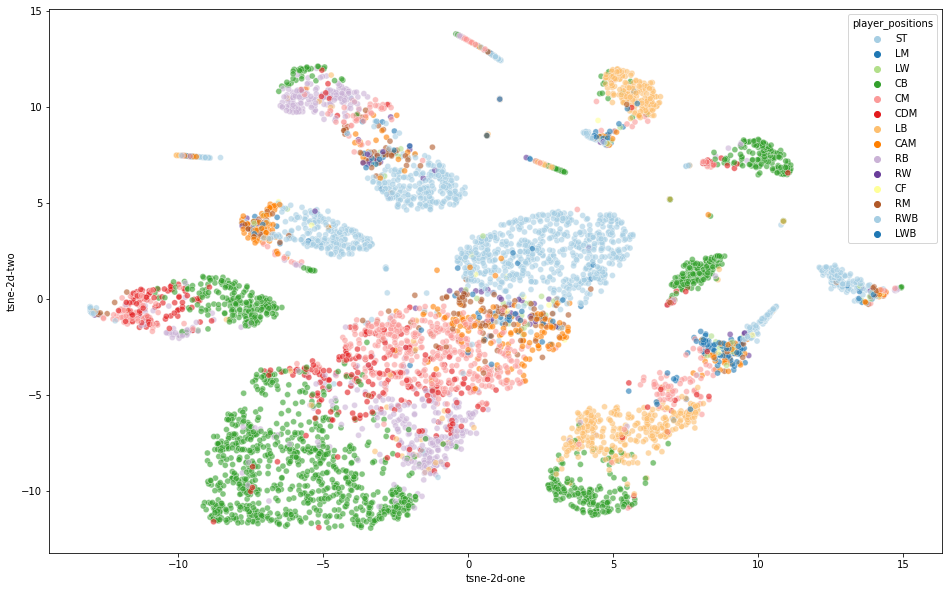

In [67]:
# plot tsne results on scatterplot, where ATK = 0, DEF = 1, GK = 2, MID = 3

df['tsne-2d-one'] = tsne_results[:,0]
df['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="player_positions",
    palette=sns.color_palette("Paired", len(df.player_positions.unique())),
    data=df,
    legend="full",
    alpha=0.6
)

In [4]:
df = pd.read_csv('datasets/cleaned_soccer_data_120K.csv')

In [5]:
df.query('fifa==16').player_positions.str.split(',')

15465         [RW,  CF]
15466         [LW,  LM]
15467    [RM,  LM,  RW]
15468              [GK]
15469              [ST]
              ...      
30341              [CM]
30342              [CM]
30343              [GK]
30344         [LB,  LM]
30345              [GK]
Name: player_positions, Length: 14881, dtype: object

In [8]:
cols = ['pace', 'shooting', 'passing', 
                'dribbling', 'defending', 'physic', 'player_positions_general']

In [11]:
df_subset = df.query('fifa==16')[cols]

In [29]:
df_subset = df_subset.query("player_positions_general!='GK'")

In [30]:
df_subset = df_subset.reset_index(drop=True)

(-0.5, 2.5, 17.25, 99.75)

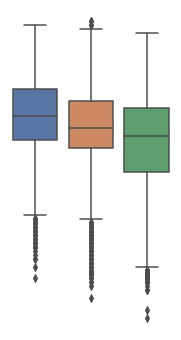

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")
fig, ax = plt.subplots(figsize=(3,6))
sns.boxplot(x=df_subset["player_positions_general"], y=df_subset["pace"])
plt.axis('off')

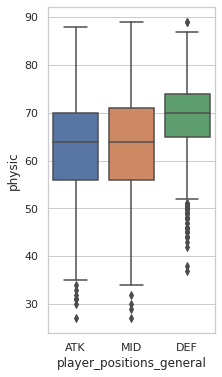

In [57]:
fig, ax = plt.subplots(figsize=(3,6))
sns.boxplot(x=df_subset["player_positions_general"], y=df_subset["physic"])

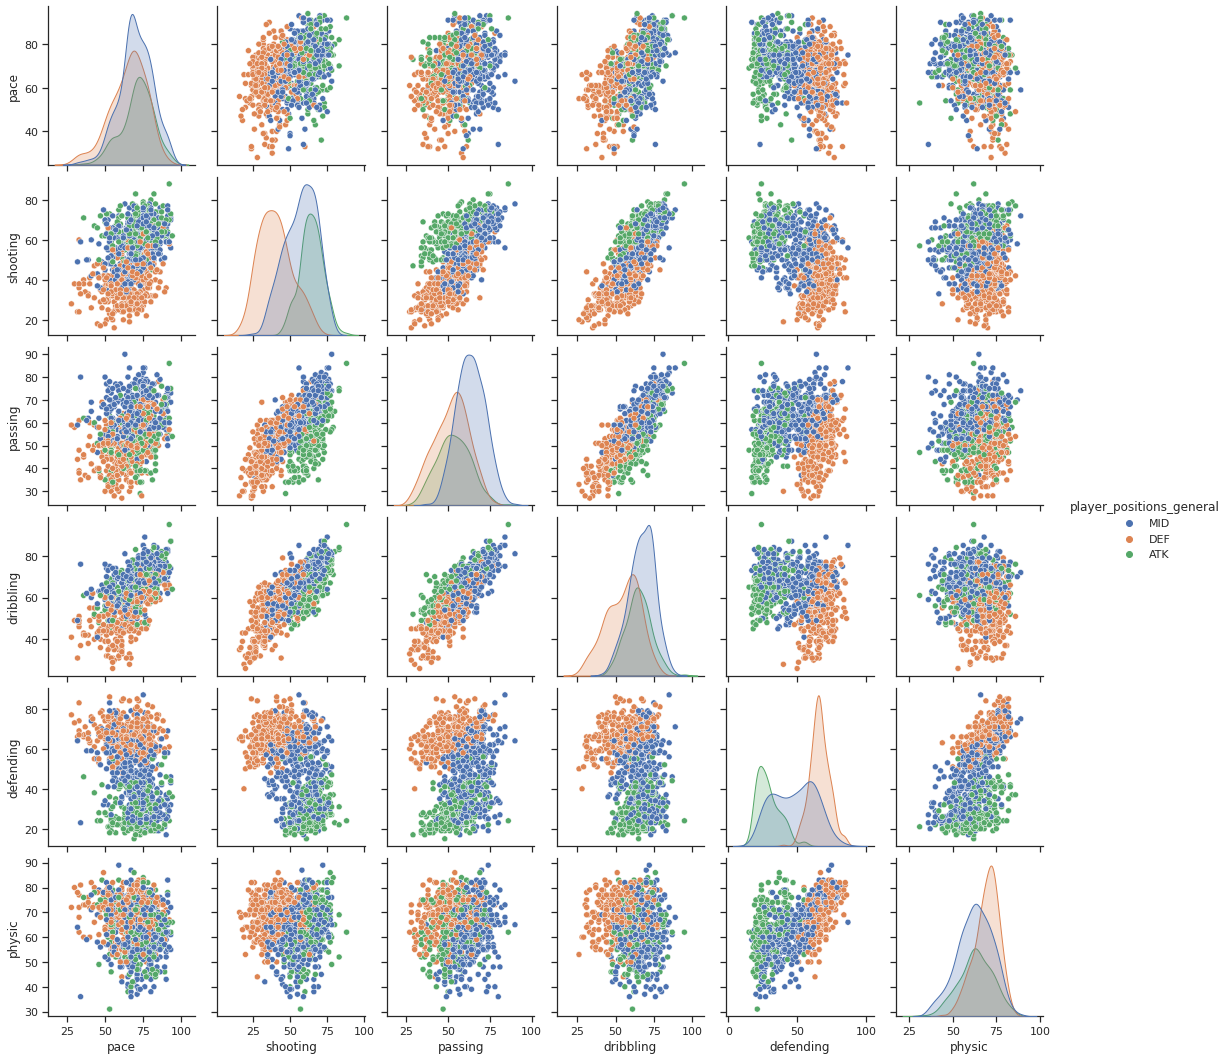

In [60]:
import seaborn as sns
sns.set_theme(style="ticks")

sns.pairplot(data=df_subset.sample(1000), hue="player_positions_general")

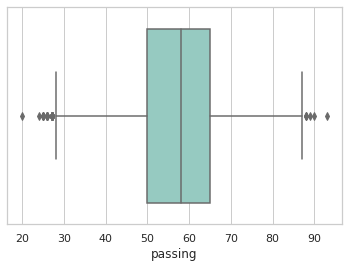

In [50]:
ax = sns.boxplot(x="passing", hue="player_positions_general",data=df_subset, palette="Set3")

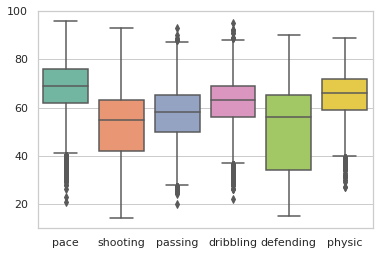

In [54]:
sns.boxplot(data=df_subset, orient="v", palette="Set2")

In [35]:
df_subset[df_subset.pace < 50]

,pace,shooting,passing,dribbling,defending,physic,player_positions_general
37,34.0,47.0,57.0,52.0,87.0,81.0,DEF
59,41.0,69.0,93.0,79.0,52.0,58.0,MID
62,33.0,69.0,88.0,77.0,76.0,70.0,MID
92,31.0,41.0,57.0,48.0,88.0,75.0,DEF
140,39.0,53.0,59.0,57.0,85.0,76.0,DEF
...,...,...,...,...,...,...,...
12949,48.0,56.0,39.0,48.0,19.0,52.0,ATK
12982,46.0,50.0,39.0,48.0,28.0,49.0,ATK
13024,49.0,52.0,34.0,49.0,18.0,51.0,ATK
13148,40.0,40.0,45.0,43.0,53.0,63.0,DEF


In [15]:
df

,sofifa_id,short_name,long_name,dob,height_cm,weight_kg,overall,potential,weak_foot,skill_moves,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,defending_marking,defending_standing_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,preferred_foot_Left,preferred_foot_Right,work_rate_0_High,work_rate_0_Low,work_rate_0_Medium,work_rate_1_High,work_rate_1_Low,work_rate_1_Medium,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_positions,player_positions_general,fifa
0,158023,L. Messi,Lionel Andrés Messi Cuccittini,1987-06-24,169,67,93,95,3,4,93.0,89.0,86.0,96.0,27.0,63.0,84,94,71,89,85,96,89,90,76,96,96,90,94,94,95,80,73,77,60,88,48,22,92,90,76,25.0,21,6,11,15,14,8,1,0,0,0,1,0,1,0,89,89,89,92,90,90,90,92,92,92,92,90,79,79,79,90,62,62,62,62,62,54,45,45,45,54,0,CF,ATK,15
1,20801,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,1985-02-05,185,80,92,92,4,5,93.0,93.0,81.0,91.0,32.0,79.0,83,95,86,82,87,93,88,79,72,92,91,94,93,90,63,94,94,89,79,93,63,24,91,81,85,22.0,31,7,11,15,14,11,0,1,1,0,0,0,1,0,91,91,91,89,91,91,91,89,89,89,89,87,77,77,77,87,63,63,63,63,63,57,52,52,52,57,0,"LW, LM",ATK,15
2,9014,A. Robben,Arjen Robben,1984-01-23,180,80,90,90,2,4,93.0,86.0,83.0,92.0,32.0,64.0,80,85,50,86,86,93,85,83,76,90,93,93,93,89,91,86,61,78,65,90,47,39,89,84,80,29.0,26,10,8,11,5,15,1,0,1,0,0,0,1,0,84,84,84,88,87,87,87,88,88,88,88,87,78,78,78,87,64,64,64,64,64,55,46,46,46,55,0,"RM, LM, RW",MID,15
3,41236,Z. Ibrahimović,Zlatan Ibrahimović,1981-10-03,195,95,90,90,4,4,76.0,91.0,81.0,86.0,34.0,86.0,76,91,76,84,92,88,80,80,76,90,74,77,86,85,41,93,72,78,93,88,84,20,86,83,91,25.0,41,13,15,10,9,12,0,1,0,0,1,0,1,0,87,87,87,84,86,86,86,84,86,86,86,83,76,76,76,83,61,65,65,65,61,56,55,55,55,56,0,ST,ATK,15
4,167495,M. Neuer,Manuel Neuer,1986-03-27,193,92,90,90,4,1,0.0,0.0,0.0,0.0,0.0,0.0,25,25,25,42,25,25,25,25,41,31,58,61,43,89,35,42,78,44,83,25,29,30,25,20,37,25.0,25,87,85,92,90,86,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,100,GK,GK,15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121404,256679,K. Angulo,Kevin Angulo,1996-04-13,176,73,47,52,2,2,63.0,37.0,50.0,47.0,41.0,50.0,45,37,43,55,27,44,35,35,53,46,64,62,53,51,71,43,57,40,51,36,57,41,31,49,39,0.0,39,10,9,14,6,6,0,1,0,0,1,0,0,1,44,44,44,47,45,45,45,47,47,47,47,48,47,47,47,48,47,47,47,47,47,47,46,46,46,47,0,CM,MID,21
121405,257710,Zhang Mengxuan,Mengxuan Zhang,1999-04-26,177,70,47,52,2,2,58.0,23.0,26.0,27.0,50.0,48.0,23,16,45,31,26,19,21,22,25,24,60,56,45,48,70,35,65,55,45,23,44,50,25,25,35,0.0,56,12,13,8,14,6,0,1,0,1,0,0,1,0,32,32,32,30,30,30,30,30,29,29,29,31,32,32,32,31,42,41,41,41,42,45,47,47,47,45,0,CB,DEF,21
121406,250989,Wang Zhenghao,王政豪,2000-06-28,185,74,47,51,2,2,51.0,25.0,29.0,36.0,45.0,55.0,20,20,46,40,22,35,20,25,25,30,54,49,40,45,57,35,69,58,55,22,46,45,25,25,35,0.0,55,12,9,14,15,13,0,1,0,1,0,0,0,1,34,34,34,33,33,33,33,33,33,33,33,35,35,35,35,35,42,42,42,42,42,44,47,47,47,44,0,CB,DEF,21
121407,257697,Chen Zitong,Zitong Chen,1997-02-20,186,80,47,51,2,2,61.0,35.0,48.0,48.0,44.0,58.0,38,32,45,56,32,45,35,35,54,48,62,60,59,51,53,45,56,48,63,33,56,40,31,45,42,0.0,49,15,7,7,5,13,0,1,0,1,0,0,1,0,44,4

In [11]:
import matplotlib.pyplot as plt

def draw_pitch(pitch, line, orientation,view):
    
    orientation = orientation
    view = view
    line = line
    pitch = pitch
    
    if view.lower().startswith("h"):
        fig,ax = plt.subplots(figsize=(20.8, 13.6))
        plt.ylim(98, 210)
        plt.xlim(-2, 138)
    else:
        fig,ax = plt.subplots(figsize=(13.6, 20.8))
        plt.ylim(-2, 210)
        plt.xlim(-2, 138)
    ax.axis('off')

    # side and goal lines
    lx1 = [0, 0, 136, 136, 0]
    ly1 = [0, 208, 208, 0, 0]

    plt.plot(lx1,ly1,color=line,zorder=5)

    # boxes, 6 yard box and goals
    # outer boxes
    lx2 = [27.68, 27.68, 108.32, 108.32] 
    ly2 = [208, 175, 175, 208]
    plt.plot(lx2,ly2,color=line,zorder=5)

    lx3 = [27.68, 27.68, 108.32, 108.32] 
    ly3 = [0, 33, 33, 0]
    plt.plot(lx3,ly3,color=line,zorder=5)

    # goals
    lx4 = [60.68, 60.68, 75.32, 75.32]
    ly4 = [208, 208.4, 208.4, 208]
    plt.plot(lx4,ly4,color=line,zorder=5)

    lx5 = [60.68, 60.68, 75.32, 75.32]
    ly5 = [0, -0.4, -0.4, 0]
    plt.plot(lx5,ly5,color=line,zorder=5)

    # 6 yard boxes
    lx6 = [49.68, 49.68, 86.32, 86.32]
    ly6 = [208, 199, 199, 208]
    plt.plot(lx6,ly6,color=line,zorder=5)

    lx7 = [49.68, 49.68, 86.32, 86.32]
    ly7 = [0, 9, 9, 0]
    plt.plot(lx7,ly7,color=line,zorder=5)

    # Halfway line, penalty spots, and kickoff spot
    lx8 = [0, 136] 
    ly8 = [104, 104]
    plt.plot(lx8,ly8,color=line,zorder=5)

    plt.scatter(68, 186, color=line, zorder=5)
    plt.scatter(68, 22, color=line, zorder=5)
    plt.scatter(68, 104, color=line, zorder=5)

    circle1 = plt.Circle((68, 187), 18.30, ls='solid', lw=3, color=line, fill=False, zorder=1, alpha=1)
    circle2 = plt.Circle((68, 21), 18.30, ls='solid', lw=3, color=line, fill=False, zorder=1, alpha=1)
    circle3 = plt.Circle((68, 104), 18.30, ls='solid', lw=3, color=line, fill=False, zorder=2, alpha=1)

    rec1 = plt.Rectangle((40, 175), 60, 33, ls='-', color=pitch, zorder=1, alpha=1)
    rec2 = plt.Rectangle((40, 0), 60, 33, ls='-', color=pitch, zorder=1, alpha=1)
    rec3 = plt.Rectangle((-1, -1), 140, 212, ls='-', color=pitch, zorder=1, alpha=1)

    ax.add_artist(rec3)
    ax.add_artist(circle1)
    ax.add_artist(circle2)
    ax.add_artist(rec1)
    ax.add_artist(rec2)
    ax.add_artist(circle3)   



In [12]:
x = [68, 68, 68, 32, 104, 68, 32, 104, 68, 44, 88, 20, 116, 12, 124, 68, 68, 16, 120, 16, 120, 40, 96, 32, 104, 32, 104]
y = [186, 150, 1, 150, 150, 112, 114, 114, 14, 16, 16, 24, 24, 50, 50, 50, 74, 74, 74, 130, 130, 74, 74, 186, 186, 50, 50]
n = [
    'ST', 'CF', 'GK', 'LF', 'RF', 'CAM', 'LAM', 'RAM', 'CB', 
    'LCB', 'RCB', 'LB', 'RB', 'LWB', 'RWB', 'CDM', 'CM', 'LM', 
    'RM', 'LW', 'RW', 'LCM', 'RCM', 'LS', 'RS', 'LDM', 'RDM'
]

In [47]:
df = df.query('fifa==16')

In [53]:
df = df.reset_index(drop=True)

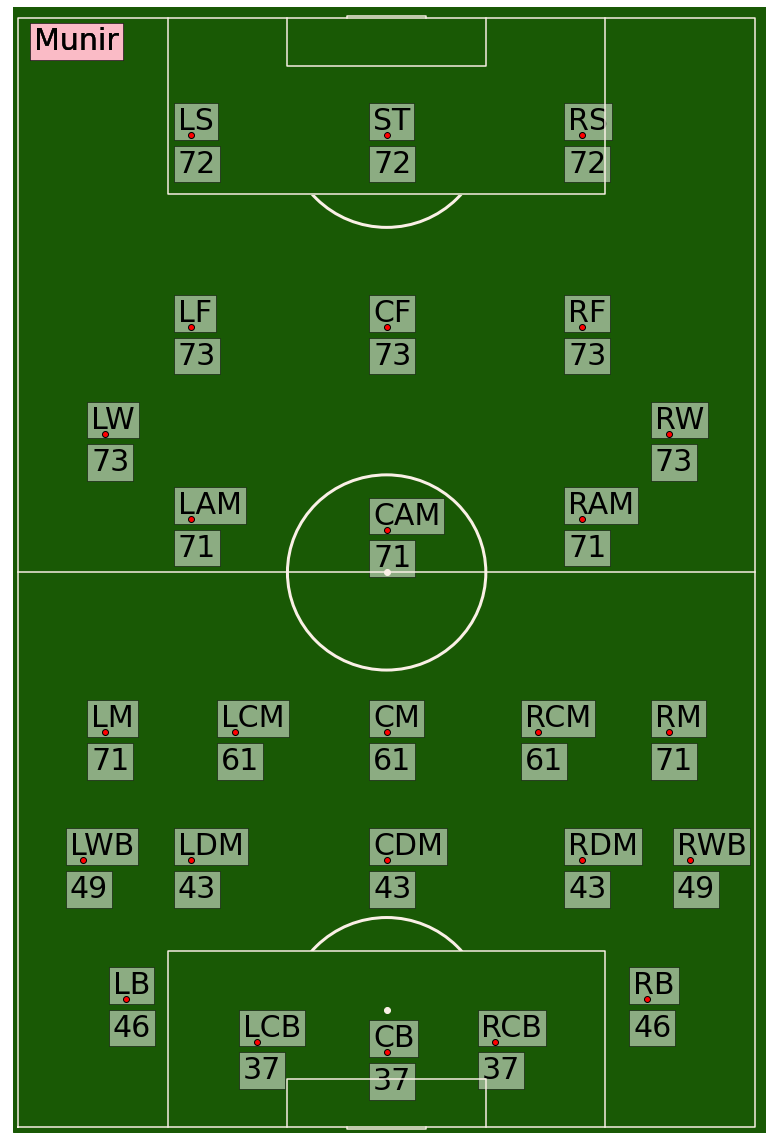

In [73]:
draw_pitch("#195905", "#faf0e6", "v", "full")
name = df.iloc[2059]["short_name"]
r = df.iloc[2059][[n_.lower() for n_ in n]].to_list()
for i, pos in enumerate(n):
    if pos == 'GK':
        continue
    x_c = x[i]
    y_c = y[i]
    plt.scatter(x_c, y_c, marker='o', color='red', edgecolors="black", zorder=10)
    plt.text(x_c-2.5, y_c+1, pos, fontsize=30, bbox=dict(facecolor='white', alpha=0.5))
    plt.text(x_c-2.5, y_c-7, r[i], fontsize=30, bbox=dict(facecolor='white', alpha=0.5))
    plt.text(3, 202, name, fontsize=30, bbox=dict(facecolor='pink', alpha=0.2))

In [107]:
df[df.short_name == 'P. Dybala']

,sofifa_id,short_name,long_name,dob,height_cm,weight_kg,overall,potential,weak_foot,skill_moves,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,defending_marking,defending_standing_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,preferred_foot_Left,preferred_foot_Right,work_rate_0_High,work_rate_0_Low,work_rate_0_Medium,work_rate_1_High,work_rate_1_Low,work_rate_1_Medium,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_positions,player_positions_general,fifa
546,211110,P. Dybala,Paulo Bruno Exequiel Dybala,1993-11-15,177,69,78,88,2,4,87.0,80.0,74.0,87.0,24.0,56.0,72,84,52,77,80,86,86,80,61,89,89,85,91,76,85,71,65,71,51,77,48,31,85,78,80,15.0,21,9,11,9,10,11,1,0,0,0,1,0,1,0,78,78,78,83,82,82,82,83,82,82,82,81,72,72,72,81,58,52,52,52,58,53,40,40,40,53,0,ST,ATK,16


In [70]:
df[df.cb == 86]

,sofifa_id,short_name,long_name,dob,height_cm,weight_kg,overall,potential,weak_foot,skill_moves,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,defending_marking,defending_standing_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,preferred_foot_Left,preferred_foot_Right,work_rate_0_High,work_rate_0_Low,work_rate_0_Medium,work_rate_1_High,work_rate_1_Low,work_rate_1_Medium,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_positions,player_positions_general,fifa
8,164240,Thiago Silva,Thiago Emiliano da Silva,1984-09-22,183,79,88,88,3,3,74.0,57.0,73.0,73.0,90.0,79.0,60,38,82,79,63,68,61,73,81,80,72,76,75,84,68,78,93,74,81,71,77,91,59,74,71,90.0,91,9,12,5,9,10,0,1,1,0,0,1,0,0,68,68,68,69,70,70,70,69,72,72,72,71,77,77,77,71,80,84,84,84,80,82,86,86,86,82,0,CB,DEF,16


In [120]:
df.query("player_positions_general=='MID'").head(30)

,sofifa_id,short_name,long_name,dob,height_cm,weight_kg,overall,potential,weak_foot,skill_moves,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,defending_marking,defending_standing_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,preferred_foot_Left,preferred_foot_Right,work_rate_0_High,work_rate_0_Low,work_rate_0_Medium,work_rate_1_High,work_rate_1_Low,work_rate_1_Medium,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_positions,player_positions_general,fifa
2,9014,A. Robben,Arjen Robben,1984-01-23,180,80,90,90,2,4,92.0,86.0,82.0,92.0,32.0,64.0,80,85,51,85,86,93,86,83,74,90,92,92,91,91,91,86,61,76,65,90,47,39,89,84,80,29.0,26,10,8,11,5,15,1,0,1,0,0,0,1,0,84,84,84,89,88,88,88,89,88,88,88,87,80,80,80,87,65,60,60,60,65,59,47,47,47,59,0,"RM, LM, RW",MID,16
5,183277,E. Hazard,Eden Hazard,1991-01-07,173,74,89,91,4,4,90.0,82.0,84.0,92.0,32.0,64.0,80,83,57,86,79,94,82,79,82,90,93,87,92,86,90,79,59,74,63,82,54,41,86,86,86,25.0,27,11,12,6,8,8,0,1,1,0,0,0,0,1,82,82,82,88,87,87,87,88,88,88,88,87,80,80,80,87,64,61,61,61,64,58,47,47,47,58,0,LM,MID,16
9,168542,David Silva,David Josué Jiménez Silva,1986-01-08,170,67,88,88,2,4,73.0,74.0,89.0,89.0,32.0,59.0,85,72,54,92,80,87,83,77,85,91,79,68,93,84,88,71,66,68,56,79,51,41,83,93,77,23.0,30,1,1,1,1,1,1,0,1,0,0,0,1,0,76,76,76,84,83,83,83,84,86,86,86,84,82,82,82,84,63,62,62,62,63,58,47,47,47,58,0,"CAM, LM",MID,16
10,198710,J. Rodríguez,James David Rodríguez Rubio,1991-07-12,180,75,87,93,3,4,78.0,86.0,85.0,85.0,43.0,72.0,88,85,68,84,91,87,82,86,80,85,78,78,83,85,74,86,55,74,71,87,74,58,83,87,81,25.0,47,15,15,15,5,14,1,0,0,0,1,0,0,1,82,82,82,85,84,84,84,85,85,85,85,84,81,81,81,84,67,66,66,66,67,63,56,56,56,63,0,"CAM, CM, RM",MID,16
11,173731,G. Bale,Gareth Frank Bale,1989-07-16,183,74,87,91,3,4,94.0,83.0,82.0,84.0,63.0,81.0,84,81,74,84,76,87,87,85,80,85,93,95,75,84,65,87,67,89,79,88,77,59,83,77,76,60.0,65,15,15,11,5,6,1,0,1,0,0,0,0,1,84,84,84,85,85,85,85,85,84,84,84,85,81,81,81,85,77,74,74,74,77,75,70,70,70,75,0,"RM, RW",MID,16
12,182521,T. Kroos,Toni Kroos,1990-01-04,182,78,87,90,5,3,56.0,81.0,88.0,82.0,66.0,69.0,85,76,54,89,82,83,84,83,90,86,60,52,71,85,62,87,54,77,72,89,54,76,76,88,73,60.0,72,10,11,13,7,10,0,1,0,0,1,0,0,1,76,76,76,80,80,80,80,80,83,83,83,80,85,85,85,80,75,77,77,77,75,72,68,68,68,72,0,"CM, CDM",MID,16
15,176635,M. Özil,Mesut Özil,1988-10-15,183,76,87,88,2,4,72.0,74.0,85.0,86.0,24.0,57.0,80,74,54,87,77,86,84,79,80,90,77,68,84,87,70,70,52,64,56,75,54,24,83,92,76,22.0,16,6,14,10,6,14,1,0,0,0,1,0,1,0,76,76,76,83,82,82,82,83,85,85,85,82,78,78,78,82,57,56,56,56,57,52,41,41,41,52,0,"CAM, LW",MID,16
16,121939,P. Lahm,Philipp Lahm,1983-11-11,170,66,87,87,3,3,75.0,56.0,84.0,85.0,87.0,66.0,84,47,63,88,66,82,77,59,84,87,77,74,83,91,93,57,72,84,59,65,58,93,69,83,71,87.0,87,11,12,5,14,5,0,1,0,0,1,1,0,0,69,69,69,78,76,76,76,78,80,80,80,80,84,84,84,80,87,85,85,85,87,86,81,81,81,86,0,"CDM, RB, CM",MID,16
20,156616,F. Ribéry,Franck Bilal Ribéry,1983-04-07,170,72,87,87,4,5,87.0,77.0,84.0,91.0,25.0,59.0,82,78,41,87,80,91,83,81,73,91,88,86,90,87,91,76,50,64,61,73,52,36,83,88,80,13.0,25,15,6,9,7,10,0,1,1,0,0,0,0,1,78,78,78,86,85,85,85,86,86,86,86,85,78,78,78,85,62,58,58,58,62,56,43,43,43,56,0,LM,MID,16
21,162895,Cesc Fàbregas,Francesc Fàbregas i Soler,1987-05-04,175,74,87,87,3,3,63.0,78.0,90.0,81.0,64.0,65.0,86,78,74,93,81,81,77,81,92,87,65,62,65,83,77,77,68,81,64,78,45,61,81,93,80,62.0,66,6,10,8,15,15,0,1,1,0,0,0,0,1,78,78,78,8

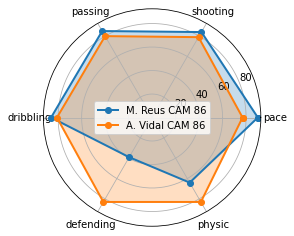

In [122]:
import seaborn as sns

labels=np.array(['pace', 'shooting', 'passing', 
                'dribbling', 'defending', 'physic'])


stats=df.loc[30,labels].values


angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
# close the plot
stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))

fig=plt.figure()
ax = fig.add_subplot(111, polar=True)
ax.plot(angles, stats, 'o-', linewidth=2, label='M. Reus CAM 86')
ax.fill(angles, stats, alpha=0.25)
ax.set_thetagrids(angles * 180/np.pi, labels)
ax.grid(True)

stats=df.loc[37,labels].values


angles=np.linspace(0, 2*np.pi, len(labels), endpoint=False)
# close the plot
stats=np.concatenate((stats,[stats[0]]))
angles=np.concatenate((angles,[angles[0]]))

ax.plot(angles, stats, 'o-', linewidth=2, label='A. Vidal CAM 86')
ax.fill(angles, stats, alpha=0.25)
ax.set_thetagrids(angles * 180/np.pi, labels)
ax.grid(True)
plt.legend()

In [202]:
df_clusters = pd.read_csv('~/Downloads/Samples by 50 clusters.csv')

In [203]:
df_clusters.query("player_positions == 'GK'")

,sofifa_id,short_name,long_name,dob,fifa,player_positions_general,player_positions,Cluster
590,212948,F. Ondoa,Fabrice Ondoa,1995-12-24,16,GK,GK,2
591,177299,A. Gabbarini,Adrián José Gabbarini,1985-10-10,16,GK,GK,2
592,212286,I. Sy,Ibrahima Sy,1995-08-13,16,GK,GK,2
593,208560,R. Pieterse,Reyaad Pieterse,1992-02-17,16,GK,GK,2
594,216470,G. Zabret,Gregor Zabret,1995-08-18,16,GK,GK,2
...,...,...,...,...,...,...,...,...
12873,172250,Jon Ander,Jon Ander Felipe González,1995-05-22,16,GK,GK,43
12874,144024,D. Zibung,David Zibung,1984-01-10,16,GK,GK,43
12875,207455,M. Schlingermann,Michael Schlingermann,1991-06-23,16,GK,GK,43
12876,223727,C. MacGillivray,Craig MacGillivray,1993-01-12,16,GK,GK,43


In [204]:
df_clusters = df_clusters.merge(df[['sofifa_id','overall','potential']], how='left',on='sofifa_id')

In [206]:
for i in range(50):
    print(df_clusters.query(f'Cluster=={i}').sort_values(by=['overall'],ascending=False).head(5)[['short_name','player_positions','overall']])

     short_name player_positions  overall
57    E. Salvio               RM       80
32     Gervinho           LW, RW       80
128  C. Beauvue       ST, LM, RM       79
213   M. Gradel       LW, RW, ST       79
127      Varela           LW, RW       78
       short_name player_positions  overall
536  Sergio Ramos               CB       87
574    David Luiz               CB       83
561   P. Zabaleta               RB       82
557    M. Cáceres           CB, RB       81
532    Marquinhos           CB, RB       81
      short_name player_positions  overall
854      J. Zoet               GK       78
911   K. Vermeer               GK       78
813   J. Speroni               GK       77
667  M. Barovero               GK       77
720       Sergio               GK       76
         short_name player_positions  overall
1214    M. Verratti          CM, CDM       84
1130  R. Nainggolan               CM       83
1500        D. Srna               RB       81
1523    Fernandinho          CM, CDM      

In [ ]:
df_clusters

In [187]:
df_clusters.query('Cluster==4').player_positions.value_counts()

CDM                 23
CDM, CM             21
CM, CDM             21
RB                  20
CM                  12
RB, LB               7
RB, RM               6
RB, CB               4
CDM, RB              3
CM, RB               3
LB, RB               3
CB, CM               3
CDM, CM, RB          2
CDM, CB              2
CM, CDM, RM          2
CDM, RB, LB          2
CM, LB               2
RB, RM, LB           2
CB, RB               2
CM, CDM, RB          2
CDM, CAM             2
RB, CM               2
RM, RB               2
RB, CDM              2
CB                   2
CDM, CB, RB          1
RB, RM, CDM          1
RM, RW, ST           1
CDM, RM              1
CM, RM               1
CB, LB               1
LB                   1
CDM, CB, CM, CAM     1
RB, CAM, RM          1
RB, LB, RM           1
CM, RM, CAM          1
RB, CM, LB           1
CDM, CM, CB          1
RB, CDM, CM          1
RB, CDM, RM          1
CM, CDM, LM          1
CM, CB, RB           1
LB, RB, LM, CM       1
CM, CDM, CA